### 두개의 데이터 셋을 합치고 처리하기

### 데이터 참고 사이트 
* our world in data
  * https://ourworldindata.org/covid-vaccinations
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 확인 및 불러오기

In [2]:
os.listdir()

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.py',
 '01_dataScraping_corona02_all.ipynb',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '03_corona_vaccine_merge.py',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '06_corona_analysis.ipynb',
 '20210921_00_datamerge.csv',
 '20210921_00_datamerge.xlsx',
 '20210929_chrome_driver_01.ipynb',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 '2021_1026_14',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'project01_01',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [3]:
path = os.getcwd() + '\\data'

In [4]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\toto\Documents\Github\corona_analysis\data\2021-08-07_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-08-07_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-19_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-19_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-20_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-20_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-28_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-28_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-29_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-29_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-11-28_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-11-28_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-11-29_01_vaccine_bloomberg.csv
C:\Users\toto\Docu

In [5]:
import pandas as pd

# excel 데이터 셋도 pd.read_excel로 가져올 수 있음.
corona = pd.read_csv("./data/2021-11-28_corona.csv")
vaccine = pd.read_csv("./data/2021-11-29_01_vaccine_bloomberg.csv")
country_code = pd.read_excel("./data/country.xlsx")

corona.shape, vaccine.shape, country_code.shape

((223, 15), (207, 6), (227, 4))

In [6]:
corona.head()

,국가,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0
1,인도🇮🇳,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0
2,브라질🇧🇷,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0
3,영국🇬🇧,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0
4,러시아🇷🇺,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0


In [7]:
vaccine.head()

,국가,백신접종수,백신보유율(인구),1차접종,2차접종,일별접종수
0,Global Total,7.901420e+09,-999.0,-999.0,-999.0,-999.0
1,Mainland China,2.472847e+09,176.6,87.5,76.9,-999.0
2,India,1.222098e+09,89.4,57.1,31.5,-999.0
3,EU,6.344497e+08,142.8,70.9,68.9,8.1
4,U.S.,4.544477e+08,136.9,69.7,59.1,11.3


In [8]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


### 코로나에 별칭을 제외한 나라명 가져오기

In [9]:
corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)')

,0
0,미국
1,인도
2,브라질
3,영국
4,러시아
...,...
218,마셜
219,사모아
220,세인트헬레나
221,미크로네시아


In [10]:
corona['한글(국가명)'] = corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)', expand=False)
corona.columns


Index(['국가', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '한글(국가명)'],
      dtype='object')

In [11]:
col = ['국가', '한글(국가명)', '치명(%)', '완치(%)', '발생률', 
       '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', 
       '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일']

new_corona = corona[col].copy()
new_corona

,국가,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0
1,인도🇮🇳,인도,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0
2,브라질🇧🇷,브라질,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0
3,영국🇬🇧,영국,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0
4,러시아🇷🇺,러시아,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,마셜 제도🇲🇭,마셜,-,100,68,59190,0.0,NaN,NaN,NaN,4,NaN,0,NaN,4.0,NaN
219,사모아🇼🇸,사모아,-,100,15,198414,0.0,NaN,NaN,NaN,3,NaN,0,NaN,3.0,NaN
220,세인트헬레나🇸🇭,세인트헬레나,-,100,329,6077,0.0,NaN,NaN,NaN,2,NaN,0,NaN,2.0,NaN
221,미크로네시아🇫🇲,미크로네시아,-,100,9,115023,0.0,NaN,NaN,NaN,1,NaN,0,NaN,1.0,NaN


### 두 데이터 셋 연결

In [12]:
new_corona.head()

,국가,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0
1,인도🇮🇳,인도,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0
2,브라질🇧🇷,브라질,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0
3,영국🇬🇧,영국,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0
4,러시아🇷🇺,러시아,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0


In [13]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


### 데이터 병합
 * 두개의 데이터 셋의 공통되는 열을 지정하여 이를 기준으로 데이터를 병합한다.

In [14]:
df_corona = new_corona.merge(country_code, left_on='한글(국가명)', 
                             right_on='국문(코로나보드)')

df_corona.head()

,국가,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,미국🇺🇸,미국,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,미국,U.S.,NaN,NaN
1,인도🇮🇳,인도,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,인도,India,NaN,NaN
2,브라질🇧🇷,브라질,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,브라질,Brazil,NaN,NaN
3,영국🇬🇧,영국,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,영국,U.K.,NaN,NaN
4,러시아🇷🇺,러시아,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,러시아,Russia,NaN,NaN


In [15]:
df_corona.drop(['국가', '국문(코로나보드)', '나라', '비고_뜻'], axis=1, inplace=True)
df_corona.head()

,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,영문(블룸버그)
0,미국,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,U.S.
1,인도,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,India
2,브라질,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,Brazil
3,영국,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,U.K.
4,러시아,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,Russia


In [16]:
vaccine.head()

,국가,백신접종수,백신보유율(인구),1차접종,2차접종,일별접종수
0,Global Total,7.901420e+09,-999.0,-999.0,-999.0,-999.0
1,Mainland China,2.472847e+09,176.6,87.5,76.9,-999.0
2,India,1.222098e+09,89.4,57.1,31.5,-999.0
3,EU,6.344497e+08,142.8,70.9,68.9,8.1
4,U.S.,4.544477e+08,136.9,69.7,59.1,11.3


### 두 개의 데이터 셋을 이용하여 병합
  * 공통 열 이름 : '영문(블룸버그)', '국가'

In [17]:
df_corona_all = df_corona.merge(vaccine, left_on='영문(블룸버그)', right_on='국가')
df_corona_all.head()

,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,...,사망자1일,완치합계,완치1일,영문(블룸버그),국가,백신접종수,백신보유율(인구),1차접종,2차접종,일별접종수
0,미국,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,...,174.0,38861714.0,21031.0,U.S.,U.S.,4.544477e+08,136.9,69.7,59.1,11.3
1,인도,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,...,621.0,33998278.0,9481.0,India,India,1.222098e+09,89.4,57.1,31.5,-999.0
2,브라질,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,...,236.0,21288281.0,5477.0,Brazil,Brazil,2.979604e+08,141.8,77.3,61.1,5.8
3,영국,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,...,131.0,8951833.0,39409.0,U.K.,U.K.,1.143047e+08,171.1,76.2,69.3,21.5
4,러시아,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,...,1224.0,8268111.0,30646.0,Russia,Russia,1.255448e+08,85.6,44.9,37.8,2.8


In [18]:
df_corona_all.drop(['국가'], axis=1, inplace=True)
df_corona_all

,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,...,사망자합계,사망자1일,완치합계,완치1일,영문(블룸버그),백신접종수,백신보유율(인구),1차접종,2차접종,일별접종수
0,미국,1.6,79.2,148270,331002651,9416669.0,5573.0,12438.0,26778.0,49077695,...,799312,174.0,38861714.0,21031.0,U.S.,4.544477e+08,136.9,69.7,59.1,11.3
1,인도,1.4,98.3,25052,1380004385,105691.0,-1328.0,8944.0,8774.0,34572523,...,468554,621.0,33998278.0,9481.0,India,1.222098e+09,89.4,57.1,31.5,-999.0
2,브라질,2.8,96.4,103862,212559417,174346.0,3520.0,8318.0,9233.0,22076863,...,614236,236.0,21288281.0,5477.0,Brazil,2.979604e+08,141.8,77.3,61.1,5.8
3,영국,1.4,88.5,148932,67886011,1013851.0,27.0,925.0,39567.0,10110408,...,144724,131.0,8951833.0,39409.0,U.K.,1.143047e+08,171.1,76.2,69.3,21.5
4,러시아,2.8,86.4,65580,145934462,1029507.0,1678.0,2300.0,33548.0,9570373,...,272755,1224.0,8268111.0,30646.0,Russia,1.255448e+08,85.6,44.9,37.8,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,-,100,119,649335,0.0,NaN,NaN,NaN,77,...,0,NaN,77.0,NaN,Macau,9.064410e+05,133.3,70.9,62.8,-999.0
174,몬트세랫,2.3,93.2,8814,4992,2.0,NaN,NaN,NaN,44,...,1,NaN,41.0,NaN,Montserrat,2.949000e+03,59.0,30.6,28.5,-999.0
175,사모아,-,100,15,198414,0.0,NaN,NaN,NaN,3,...,0,NaN,3.0,NaN,Samoa,2.398830e+05,119.3,69.0,42.9,-999.0
176,세인트헬레나,-,100,329,6077,0.0,NaN,NaN,NaN,2,...,0,NaN,2.0,NaN,St. Helena,7.892000e+03,131.5,72.7,58.9,-999.0


In [19]:
df_corona_all.columns

Index(['한글(국가명)', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '영문(블룸버그)',
       '백신접종수', '백신보유율(인구)', '1차접종', '2차접종', '일별접종수'],
      dtype='object')

In [20]:
sel = ['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종',  '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', 
       '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)' ]
df_corona_all_n = df_corona_all[sel].copy()
df_corona_all_n


,한글(국가명),영문(블룸버그),1차접종,2차접종,일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,69.7,59.1,11.3,1.6,79.2,148270,331002651,9416669.0,...,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9
1,인도,India,57.1,31.5,-999.0,1.4,98.3,25052,1380004385,105691.0,...,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4
2,브라질,Brazil,77.3,61.1,5.8,2.8,96.4,103862,212559417,174346.0,...,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8
3,영국,U.K.,76.2,69.3,21.5,1.4,88.5,148932,67886011,1013851.0,...,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1
4,러시아,Russia,44.9,37.8,2.8,2.8,86.4,65580,145934462,1029507.0,...,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,70.9,62.8,-999.0,-,100,119,649335,0.0,...,NaN,NaN,77,NaN,0,NaN,77.0,NaN,9.064410e+05,133.3
174,몬트세랫,Montserrat,30.6,28.5,-999.0,2.3,93.2,8814,4992,2.0,...,NaN,NaN,44,NaN,1,NaN,41.0,NaN,2.949000e+03,59.0
175,사모아,Samoa,69.0,42.9,-999.0,-,100,15,198414,0.0,...,NaN,NaN,3,NaN,0,NaN,3.0,NaN,2.398830e+05,119.3
176,세인트헬레나,St. Helena,72.7,58.9,-999.0,-,100,329,6077,0.0,...,NaN,NaN,2,NaN,0,NaN,2.0,NaN,7.892000e+03,131.5


In [21]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '일별접종수', '치명(%)', '완치(%)', '발생률',
       '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '백신접종수', '백신보유율(인구)'],
      dtype='object')

In [22]:
df_corona_all_n.sort_values(['2차접종'], ascending=False)

,한글(국가명),영문(블룸버그),1차접종,2차접종,일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
158,지브롤터,Gibraltar,120.3,117.1,47.2,1.4,92.4,213084,33691,449.0,...,2.0,17.0,7179,17.0,98,NaN,6632.0,144.0,96771.0,284.6
110,몰디브,Maldives,106.3,97.5,2.1,0.3,97.8,168996,540544,1807.0,...,23.0,76.0,91350,76.0,248,NaN,89295.0,105.0,766159.0,206.0
80,싱가포르,Singapore,88.9,87.9,-999.0,0.3,94.1,44721,5850342,14684.0,...,58.0,1761.0,261636,1761.0,690,6.0,246262.0,1897.0,10083329.0,176.8
36,포르투갈,Portugal,88.3,86.9,-999.0,1.6,93.9,112066,10196709,51689.0,...,104.0,3364.0,1139810,3364.0,18405,12.0,1069716.0,2543.0,16339507.0,159.0
26,칠레,Chile,88.0,83.9,42.6,2.2,93.9,92037,19116201,68623.0,...,674.0,NaN,1757077,NaN,38282,NaN,1650172.0,NaN,40421676.0,211.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,기니비사우,Guinea-Bissau,19.5,1.0,-999.0,2.3,97.2,3272,1968001,35.0,...,NaN,1.0,6440,1.0,146,NaN,6259.0,1.0,365089.0,20.6
152,남수단,South Sudan,1.4,1.0,-999.0,1.0,97.5,1136,11193725,189.0,...,2.0,NaN,12717,NaN,133,NaN,12395.0,NaN,218154.0,1.6
166,차드,Chad,1.1,0.4,-999.0,3.4,95.5,311,16425864,56.0,...,NaN,NaN,5105,NaN,175,NaN,4874.0,NaN,249651.0,1.6
118,콩고민주공화국,DR Congo,0.1,0.1,-999.0,1.9,87.6,649,89561403,6081.0,...,NaN,NaN,58115,NaN,1104,NaN,50930.0,NaN,186749.0,0.2


In [23]:
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    178 non-null    object 
 1   영문(블룸버그)   178 non-null    object 
 2   1차접종       178 non-null    float64
 3   2차접종       178 non-null    float64
 4   일별접종수      178 non-null    float64
 5   치명(%)      178 non-null    object 
 6   완치(%)      175 non-null    object 
 7   발생률        178 non-null    object 
 8   인구수        178 non-null    object 
 9   치료중합계      175 non-null    float64
 10  치료중1일      120 non-null    float64
 11  위중증합계      131 non-null    float64
 12  위중증1일      124 non-null    float64
 13  확진자합계      178 non-null    int64  
 14  확진자1일      124 non-null    float64
 15  사망자합계      178 non-null    int64  
 16  사망자1일      91 non-null     float64
 17  완치합계       175 non-null    float64
 18  완치1일       112 non-null    float64
 19  백신접종수      178 non-null    float64
 20  백신보유율(인구) 

In [24]:
df_corona_all_n['발생률'] = df_corona_all_n['발생률'].astype(int)
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    178 non-null    object 
 1   영문(블룸버그)   178 non-null    object 
 2   1차접종       178 non-null    float64
 3   2차접종       178 non-null    float64
 4   일별접종수      178 non-null    float64
 5   치명(%)      178 non-null    object 
 6   완치(%)      175 non-null    object 
 7   발생률        178 non-null    int32  
 8   인구수        178 non-null    object 
 9   치료중합계      175 non-null    float64
 10  치료중1일      120 non-null    float64
 11  위중증합계      131 non-null    float64
 12  위중증1일      124 non-null    float64
 13  확진자합계      178 non-null    int64  
 14  확진자1일      124 non-null    float64
 15  사망자합계      178 non-null    int64  
 16  사망자1일      91 non-null     float64
 17  완치합계       175 non-null    float64
 18  완치1일       112 non-null    float64
 19  백신접종수      178 non-null    float64
 20  백신보유율(인구) 

In [25]:
df_corona_all_n['발생률순위'] = df_corona_all_n['발생률'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n['2차접종률순위'] = df_corona_all_n['2차접종'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n


,한글(국가명),영문(블룸버그),1차접종,2차접종,일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,...,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),발생률순위,2차접종률순위
0,미국,U.S.,69.7,59.1,11.3,1.6,79.2,148270,331002651,9416669.0,...,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9,17.0,70.0
1,인도,India,57.1,31.5,-999.0,1.4,98.3,25052,1380004385,105691.0,...,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4,108.0,112.0
2,브라질,Brazil,77.3,61.1,5.8,2.8,96.4,103862,212559417,174346.0,...,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8,41.0,62.5
3,영국,U.K.,76.2,69.3,21.5,1.4,88.5,148932,67886011,1013851.0,...,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1,16.0,37.0
4,러시아,Russia,44.9,37.8,2.8,2.8,86.4,65580,145934462,1029507.0,...,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6,75.0,98.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,70.9,62.8,-999.0,-,100,119,649335,0.0,...,77,NaN,0,NaN,77.0,NaN,9.064410e+05,133.3,175.0,56.5
174,몬트세랫,Montserrat,30.6,28.5,-999.0,2.3,93.2,8814,4992,2.0,...,44,NaN,1,NaN,41.0,NaN,2.949000e+03,59.0,126.0,114.0
175,사모아,Samoa,69.0,42.9,-999.0,-,100,15,198414,0.0,...,3,NaN,0,NaN,3.0,NaN,2.398830e+05,119.3,177.0,92.0
176,세인트헬레나,St. Helena,72.7,58.9,-999.0,-,100,329,6077,0.0,...,2,NaN,0,NaN,2.0,NaN,7.892000e+03,131.5,172.0,71.0


In [26]:
df_corona_all_n.sort_values(['2차접종률순위'], ascending=True)


,한글(국가명),영문(블룸버그),1차접종,2차접종,일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,...,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),발생률순위,2차접종률순위
158,지브롤터,Gibraltar,120.3,117.1,47.2,1.4,92.4,213084,33691,449.0,...,7179,17.0,98,NaN,6632.0,144.0,96771.0,284.6,4.0,1.0
110,몰디브,Maldives,106.3,97.5,2.1,0.3,97.8,168996,540544,1807.0,...,91350,76.0,248,NaN,89295.0,105.0,766159.0,206.0,10.0,2.0
80,싱가포르,Singapore,88.9,87.9,-999.0,0.3,94.1,44721,5850342,14684.0,...,261636,1761.0,690,6.0,246262.0,1897.0,10083329.0,176.8,93.0,3.0
36,포르투갈,Portugal,88.3,86.9,-999.0,1.6,93.9,112066,10196709,51689.0,...,1139810,3364.0,18405,12.0,1069716.0,2543.0,16339507.0,159.0,34.0,4.0
26,칠레,Chile,88.0,83.9,42.6,2.2,93.9,92037,19116201,68623.0,...,1757077,NaN,38282,NaN,1650172.0,NaN,40421676.0,211.6,52.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,남수단,South Sudan,1.4,1.0,-999.0,1.0,97.5,1136,11193725,189.0,...,12717,NaN,133,NaN,12395.0,NaN,218154.0,1.6,163.0,174.5
160,기니비사우,Guinea-Bissau,19.5,1.0,-999.0,2.3,97.2,3272,1968001,35.0,...,6440,1.0,146,NaN,6259.0,1.0,365089.0,20.6,147.0,174.5
166,차드,Chad,1.1,0.4,-999.0,3.4,95.5,311,16425864,56.0,...,5105,NaN,175,NaN,4874.0,NaN,249651.0,1.6,173.0,176.0
118,콩고민주공화국,DR Congo,0.1,0.1,-999.0,1.9,87.6,649,89561403,6081.0,...,58115,NaN,1104,NaN,50930.0,NaN,186749.0,0.2,170.0,177.0


In [27]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '일별접종수', '치명(%)', '완치(%)', '발생률',
       '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '백신접종수', '백신보유율(인구)', '발생률순위', '2차접종률순위'],
      dtype='object')

In [28]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '일별접종수', '치명(%)', '완치(%)', '발생률',
       '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '백신접종수', '백신보유율(인구)', '발생률순위', '2차접종률순위'],
      dtype='object')

In [29]:
sel = [ '한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', 
        '일별접종수', '치명(%)', '완치(%)', '발생률',
        '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계',
        '사망자1일', '완치합계', '완치1일', '백신접종수', '백신보유율(인구)']

df_corona_all_n = df_corona_all_n[sel]
df_corona_all_n


,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,일별접종수,치명(%),완치(%),발생률,...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,69.7,59.1,17.0,70.0,11.3,1.6,79.2,148270,...,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9
1,인도,India,57.1,31.5,108.0,112.0,-999.0,1.4,98.3,25052,...,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4
2,브라질,Brazil,77.3,61.1,41.0,62.5,5.8,2.8,96.4,103862,...,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8
3,영국,U.K.,76.2,69.3,16.0,37.0,21.5,1.4,88.5,148932,...,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1
4,러시아,Russia,44.9,37.8,75.0,98.5,2.8,2.8,86.4,65580,...,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,70.9,62.8,175.0,56.5,-999.0,-,100,119,...,NaN,NaN,77,NaN,0,NaN,77.0,NaN,9.064410e+05,133.3
174,몬트세랫,Montserrat,30.6,28.5,126.0,114.0,-999.0,2.3,93.2,8814,...,NaN,NaN,44,NaN,1,NaN,41.0,NaN,2.949000e+03,59.0
175,사모아,Samoa,69.0,42.9,177.0,92.0,-999.0,-,100,15,...,NaN,NaN,3,NaN,0,NaN,3.0,NaN,2.398830e+05,119.3
176,세인트헬레나,St. Helena,72.7,58.9,172.0,71.0,-999.0,-,100,329,...,NaN,NaN,2,NaN,0,NaN,2.0,NaN,7.892000e+03,131.5


In [30]:
df_corona_all_n.sort_values(['발생률순위'])

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,일별접종수,치명(%),완치(%),발생률,...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
97,몬테네그로,Montenegro,43.7,40.7,1.0,95.0,-999.0,1.5,96.7,249350,...,60.0,340.0,156608,340.0,2283,2.0,151467.0,412.0,5.281110e+05,84.8
134,세이셸,Seychelles,85.3,81.1,2.0,7.0,-999.0,0.5,97.4,235869,...,NaN,NaN,23197,NaN,125,NaN,22590.0,NaN,1.780930e+05,185.5
145,안도라,Andorra,71.4,64.3,3.0,53.0,-999.0,0.8,94.4,216295,...,4.0,NaN,16712,NaN,131,NaN,15770.0,NaN,1.045340e+05,135.8
158,지브롤터,Gibraltar,120.3,117.1,4.0,1.0,47.2,1.4,92.4,213084,...,2.0,17.0,7179,17.0,98,NaN,6632.0,144.0,9.677100e+04,284.6
44,조지아,Georgia,30.7,26.6,5.0,119.0,-999.0,1.4,92.9,210229,...,NaN,3333.0,838639,3333.0,11927,56.0,779510.0,5052.0,2.133935e+06,57.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,니제르,Niger,2.2,2.0,174.0,166.0,-999.0,3.7,94.0,287,...,2.0,25.0,6958,25.0,254,NaN,6541.0,6.0,9.630410e+05,4.1
173,마카오,Macau,70.9,62.8,175.0,56.5,-999.0,-,100,119,...,NaN,NaN,77,NaN,0,NaN,77.0,NaN,9.064410e+05,133.3
109,중국,Mainland China,87.5,76.9,176.0,16.5,-999.0,4.7,94.5,69,...,NaN,42.0,98650,42.0,4636,NaN,93210.0,47.0,2.472847e+09,176.6
175,사모아,Samoa,69.0,42.9,177.0,92.0,-999.0,-,100,15,...,NaN,NaN,3,NaN,0,NaN,3.0,NaN,2.398830e+05,119.3


### 인구당 확진자 비율

In [31]:
df_corona_all_n['확진자비율(인구)'] = df_corona_all_n['확진자합계'].astype(int)/df_corona_all_n['인구수'].astype(int)
df_corona_all_n

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,일별접종수,치명(%),완치(%),발생률,...,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),확진자비율(인구)
0,미국,U.S.,69.7,59.1,17.0,70.0,11.3,1.6,79.2,148270,...,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9,0.148270
1,인도,India,57.1,31.5,108.0,112.0,-999.0,1.4,98.3,25052,...,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4,0.025052
2,브라질,Brazil,77.3,61.1,41.0,62.5,5.8,2.8,96.4,103862,...,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8,0.103862
3,영국,U.K.,76.2,69.3,16.0,37.0,21.5,1.4,88.5,148932,...,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1,0.148932
4,러시아,Russia,44.9,37.8,75.0,98.5,2.8,2.8,86.4,65580,...,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6,0.065580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,70.9,62.8,175.0,56.5,-999.0,-,100,119,...,NaN,77,NaN,0,NaN,77.0,NaN,9.064410e+05,133.3,0.000119
174,몬트세랫,Montserrat,30.6,28.5,126.0,114.0,-999.0,2.3,93.2,8814,...,NaN,44,NaN,1,NaN,41.0,NaN,2.949000e+03,59.0,0.008814
175,사모아,Samoa,69.0,42.9,177.0,92.0,-999.0,-,100,15,...,NaN,3,NaN,0,NaN,3.0,NaN,2.398830e+05,119.3,0.000015
176,세인트헬레나,St. Helena,72.7,58.9,172.0,71.0,-999.0,-,100,329,...,NaN,2,NaN,0,NaN,2.0,NaN,7.892000e+03,131.5,0.000329


In [32]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '일별접종수',
       '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일',
       '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)', '확진자비율(인구)'],
      dtype='object')

In [33]:
sel = ['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)', 
       '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일',
       '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)']
df_corona_all_n =  df_corona_all_n[sel]
df_corona_all_n

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,...,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,...,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,...,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8
3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,...,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1
4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,...,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,70.9,62.8,175.0,56.5,0.000119,-999.0,-,100,...,NaN,NaN,77,NaN,0,NaN,77.0,NaN,9.064410e+05,133.3
174,몬트세랫,Montserrat,30.6,28.5,126.0,114.0,0.008814,-999.0,2.3,93.2,...,NaN,NaN,44,NaN,1,NaN,41.0,NaN,2.949000e+03,59.0
175,사모아,Samoa,69.0,42.9,177.0,92.0,0.000015,-999.0,-,100,...,NaN,NaN,3,NaN,0,NaN,3.0,NaN,2.398830e+05,119.3
176,세인트헬레나,St. Helena,72.7,58.9,172.0,71.0,0.000329,-999.0,-,100,...,NaN,NaN,2,NaN,0,NaN,2.0,NaN,7.892000e+03,131.5


### 파일 생성

In [36]:
from datetime import datetime
import os

now = datetime.now()
file_make_time = "%04d-%02d-%02d_%02d" % (now.year, now.month, now.day, now.hour)
print( file_make_time )

path_dir = os.getcwd() + "\\data\\"
path_file = path_dir + file_make_time
print( path_dir,  path_file, sep="\n" )

2021-11-29_01
C:\Users\toto\Documents\Github\corona_analysis\data\
C:\Users\toto\Documents\Github\corona_analysis\data\2021-11-29_01


In [37]:
df_corona_all_n.to_csv(path_file + "_datamerge.csv", index=False)
df_corona_all_n.to_excel(path_file + "_datamerge.xlsx", index=False)

In [38]:
import seaborn as sns

### 백신 접종률과 인구당 확진자 비율의 상관관계

In [39]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [40]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [41]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
       '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)'],
      dtype='object')

In [42]:
df_corona_all_n.head()

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,69.7,59.1,17.0,70.0,0.148270,11.3,1.6,79.2,...,12438.0,26778.0,49077695,26778.0,799312,174.0,38861714.0,21031.0,4.544477e+08,136.9
1,인도,India,57.1,31.5,108.0,112.0,0.025052,-999.0,1.4,98.3,...,8944.0,8774.0,34572523,8774.0,468554,621.0,33998278.0,9481.0,1.222098e+09,89.4
2,브라질,Brazil,77.3,61.1,41.0,62.5,0.103862,5.8,2.8,96.4,...,8318.0,9233.0,22076863,9233.0,614236,236.0,21288281.0,5477.0,2.979604e+08,141.8
3,영국,U.K.,76.2,69.3,16.0,37.0,0.148932,21.5,1.4,88.5,...,925.0,39567.0,10110408,39567.0,144724,131.0,8951833.0,39409.0,1.143047e+08,171.1
4,러시아,Russia,44.9,37.8,75.0,98.5,0.065580,2.8,2.8,86.4,...,2300.0,33548.0,9570373,33548.0,272755,1224.0,8268111.0,30646.0,1.255448e+08,85.6


In [43]:
df_corona_all_n['2차접종'].describe()

count    178.000000
mean      37.096629
std       82.845719
min     -999.000000
25%       18.550000
50%       43.000000
75%       66.400000
max      117.100000
Name: 2차접종, dtype: float64

### 확진자 비율과 백신 접종률 상관관계 확인해 보기

In [44]:
df_corona_all_n = df_corona_all_n[df_corona_all_n['2차접종'] > 0 ]

In [45]:
df_corona_all_n[ ['2차접종', '확진자비율(인구)' ]].corr()

,2차접종,확진자비율(인구)
2차접종,1.000000,0.544796
확진자비율(인구),0.544796,1.000000


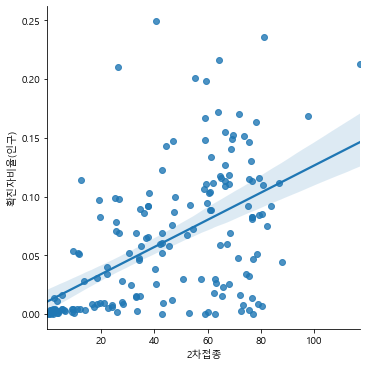

In [46]:
sns.lmplot(x='2차접종', y='확진자비율(인구)', data=df_corona_all_n)
plt.show()

### 인구당 확진자 발생 비율과 백신 접종률 상관관계 그래프 그려보기

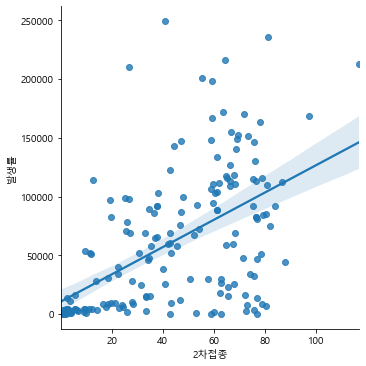

In [47]:
sns.lmplot(x='2차접종', y='발생률', data=df_corona_all_n)
plt.show()

In [48]:
df_corona_all_n.corr()['2차접종']['발생률']

0.5448464049141358

In [49]:
df_corona_all_n.corr()['2차접종']['확진자비율(인구)']

0.5447961225898682

### 01 현재까지의 누적된 데이터로 확인 결과 백신 2차 접종률과 인구당 확진자 비율은 양의 상관관계를 갖는다.
### 02 현재까지의 누적된 데이터로 확인 결과 백신 2차 접종률과 100만명당 발생률은 양의 상관관계를 갖는다.